In [4]:
import mynn as nn
from draw_tools.plot import plot
import datetime

import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt
import pickle
import os
from glob import glob
import json

# fixed seed for experiment
np.random.seed(309)

data_dir = "dataset/cifar-10-batches-py/"
model_path = r'results\DataAug_3+Jitter\best_models\best_model.pickle'
    
# get data mean and build transformation
def rescale_and_centralize_transform_test(image):
    image = np.array(image)
    image = image / 255.0
    image = (image - 0.47467072329452614) / 0.2525121587390629
    return image

def reshape(image):
    '''
    in: 3072, out [3, 32, 32]
    '''
    image = image.reshape(3, 32, 32)
    return image

def flatten(image):
    '''
    in: [3, 32, 32], out [3, 32, 32]
    '''
    image = image.reshape(-1)
    return image

test_set = nn.dataset.CIFAR10(dir_path=data_dir, mode="train", eval_batch=5, transformation=rescale_and_centralize_transform_test)
test_loader = nn.dataloader.Dataloader(test_set, batch_size=len(test_set))

model = nn.models.Model_MLP()
model.load_model(model_path)

score = 0
count = 0
for d in test_loader:
        X = d["data"]
        y = d["label"]
        outputs = X
        for i, layer in enumerate(model.layers):
            outputs = layer(outputs)
            if i == 1:
                temp = outputs     
        logits = outputs
        score += len(y) * nn.metric.accuracy(logits, y)
        count += len(y)
score /= count

print("Score:", score)

Get 40000 images for train.
Score: 0.5825


In [5]:
temp_1 = temp[:10000]
temp_2 = temp[10000:20000]
temp_3 = temp[20000:30000]
temp_4 = temp[30000:40000]
temp_label_1 = temp[y==1]

201
Get 40000 images for train.


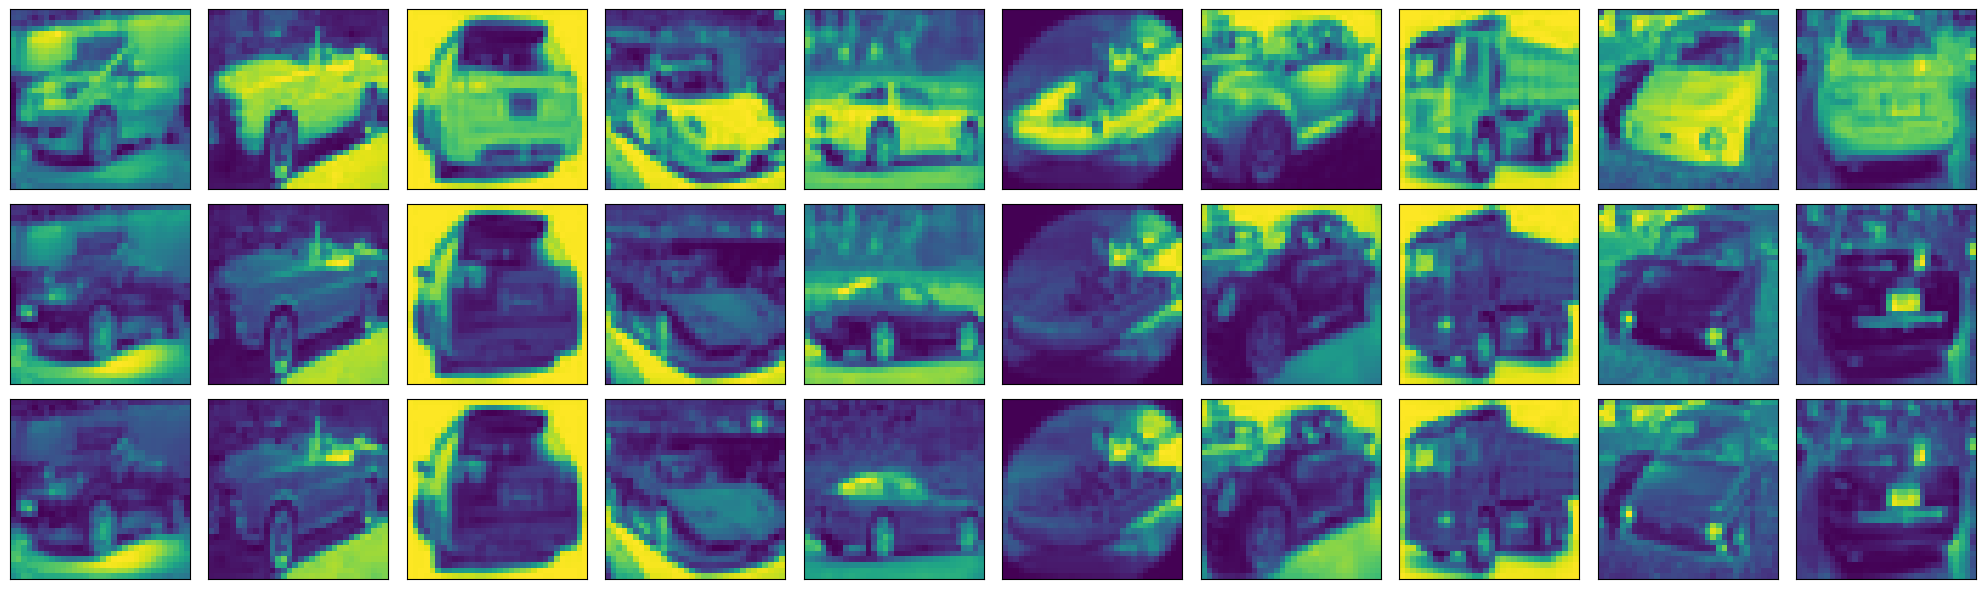

In [16]:
a = temp[:, 67]
print((a >= 7).sum())
indices = np.where((a >= 7))[0]
show_set = nn.dataset.CIFAR10(dir_path=data_dir, mode="train", eval_batch=5)
_, axes = plt.subplots(3, 10, figsize=(20, 6))
_.set_tight_layout(1)
for i, indice in enumerate(indices):
    if i >= 10:
        break
    image = show_set.get_idx(indice)['data'].reshape(3, 32, 32)
    axes[0, i].imshow(image[0])
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    axes[1, i].imshow(image[1])
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    axes[2, i].imshow(image[2])
    axes[2, i].set_xticks([])
    axes[2, i].set_yticks([])

In [26]:
indices

array([ 1869, 11869, 21869, 31869], dtype=int64)

In [71]:
indices[0]

array([   13,    71,    78, ..., 39988, 39993, 39995], dtype=int64)

In [44]:
# temp_1_mean = temp_1.mean(axis=0)
# temp_2_mean = temp_2.mean(axis=0)
# temp_3_mean = temp_3.mean(axis=0)
# temp_4_mean = temp_4.mean(axis=0)
temp_label_1_mean = temp_label_1.mean(axis=0)
temp_1_mean = temp_1[0]
temp_2_mean = temp_2[0]
temp_3_mean = temp_3[0]
temp_4_mean = temp_4[0]
# temp_label_1_mean = temp_label_1[0]
m = [temp_1_mean, temp_2_mean, temp_3_mean, temp_4_mean, temp_label_1_mean]

label_mean_list = []
for i in range(10):
    temp_label = temp[y==i]
    label_mean_list.append(temp_label.mean(axis=0))

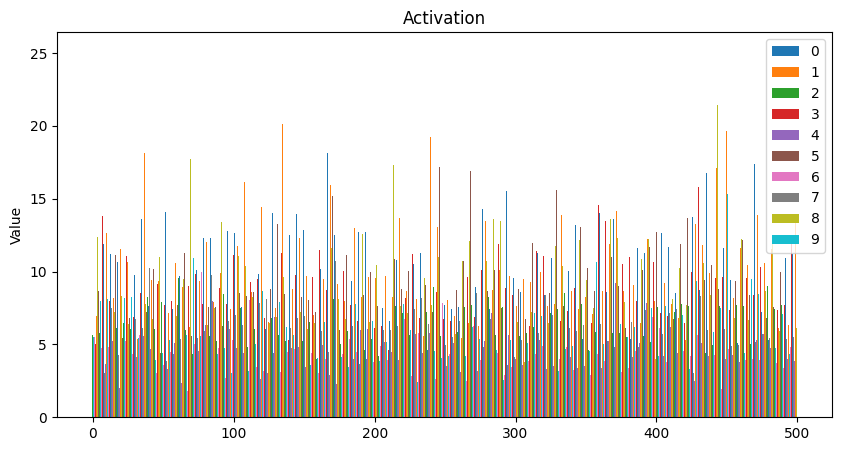

In [46]:
import numpy as np
from glob import glob
import os
bar_width = 0.1
plt.figure(figsize=(10, 5))
for i, b in enumerate(label_mean_list):
    plt.bar(np.arange(500) + (i - 4.5) * bar_width, b, width=bar_width, label=i)
plt.legend()
plt.title('Activation')
# plt.xticks(np.arange(10))
plt.ylabel('Value')
plt.show()